# Predicting Heart Disease using Machine Learning

-> This notebook looks into using various Python-based Machine Learning and Data Science libraries in an attempt to build a machine learning model capable of predicting whether a person has heart disease or not based on their medical attributes.

The following approach has been taken:
1. Problem Defination
2. Data (overview of data)
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Defination
---> Given clinical parameters about patients, and the objective here is to predict whether they have heart disease or not?

Hence, the problem falls under the category of `CLASSIFICATION`.

##### What is **Classification**?
Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

### 2. Data
---> The original data (named Cleveland Clinic Heart Disease Dataset) came from UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease 

It is also available on Kaggle: https://www.kaggle.com/datasets/aavigan/cleveland-clinic-heart-disease-dataset 

### 3. Evaluation
---> If the model can reach (approx.) 95% accuracy at predicting whether or not a patient has heart disease, then we will pursue the project.

### 4. Features
---> Info about all the features (columns): https://archive.ics.uci.edu/dataset/45/heart+disease (under the section 'Variables Table' & 'Additional Variable Information')

### Preparing the tools...
For Data Analysis and Manipulation, using `pandas`, `numpy`, & `matplotlib`.

In [1]:
# Importing all the tools we need

# Regualr EDA (Explanatory Data Analysis) & plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

# for the plots to appear in the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay
# from sklearn.metrics import plot_roc_curve (can not import this library, so inplace of it imported RocCurveDisplay)

### Loading the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape # (rows, columns)

(303, 14)

### Data Exploration (Exploratory Data Analysis or EDA)
---> The goal here is to find out more about the data & become subject matter expert on the data we are working with.

* Checklist (or what we are figuring out):
  1. What question(s) are we trying to solve?
  2. What kind of data do we have & how do we treat different types?
  3. What is missing from the data and how to deal with it?
  4. What are the outliers and why should we take care of them?
  5. How can we add, change or remove features to get more out the data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# How many of type of patients are there
# 0 -> patient dont have heart disease
# 1 -> patient have heart disease
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

* Since both of the types are almost even, this is a "balanced classification problem"


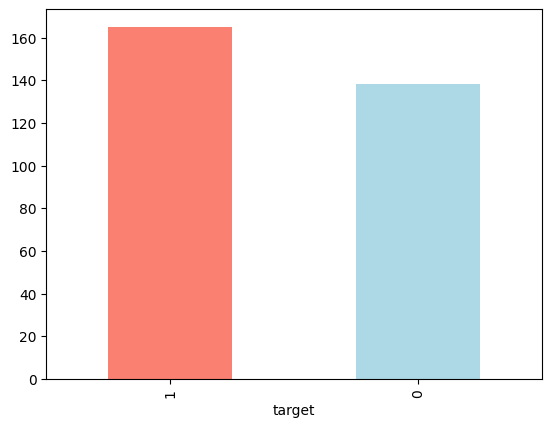

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Finding Patterns
* Heart Disease Frequency in relation to Sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Comparing target column with the sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


* Intuition from the output: (purely raw...)
    1. If the patient is a female (sex=0), then there is a 75% chance that she has heart disease (since 72 (approx. 75) out of 96 (approx. 100) have heart disease).
    2. If the patient is a male (sex=1), then there is a 50% chance that he has heart disease (since 93 (approx. 100) out of 207 (approx. 200) have heart disease).

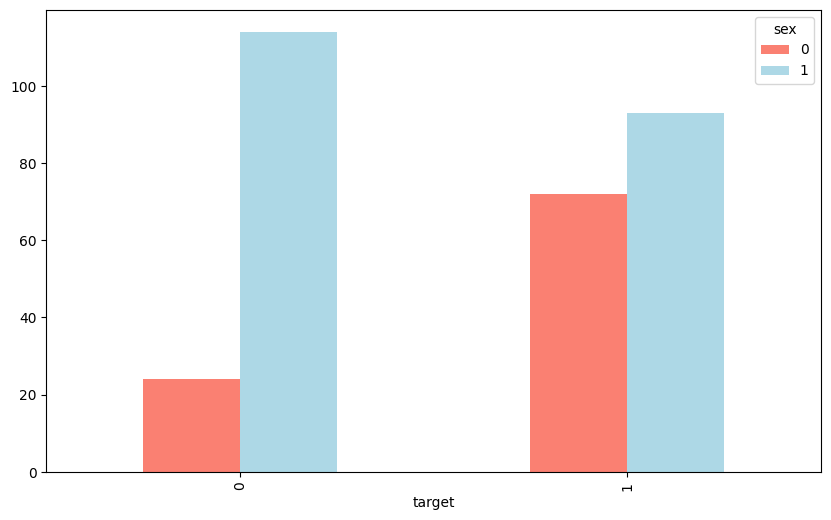

In [13]:
# creating a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);

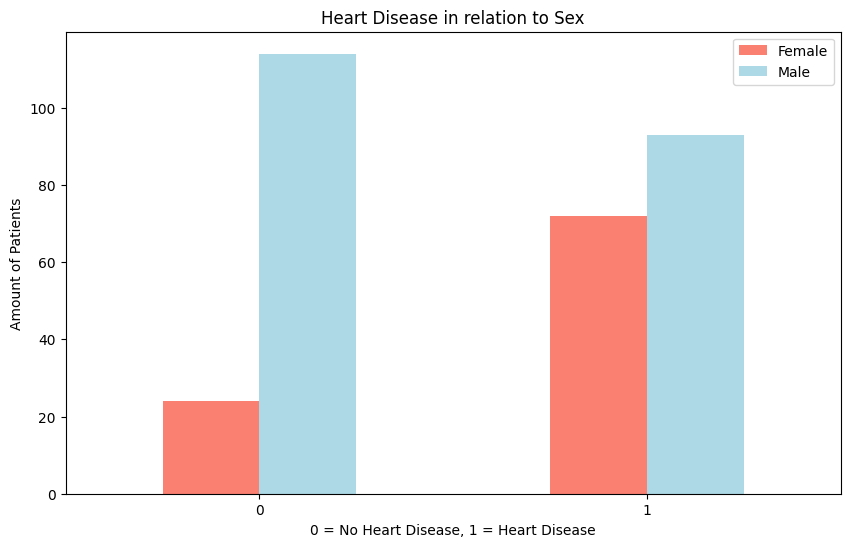

In [14]:
# Making the above graph a little more better and interactive
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);
plt.title("Heart Disease in relation to Sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount of Patients")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

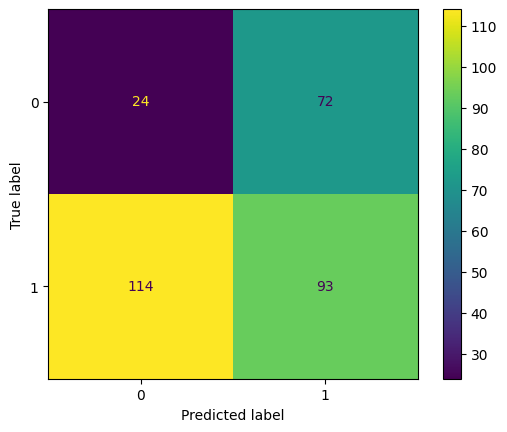

In [15]:
# Extra - Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=df.sex,
                                        y_pred=df.target);

# ok this doesn't make sense but just keeping it here

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Try to combine (or find patterns) age, thalach (max heart rate) and target

In [17]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

-> Since there are 91 different values of thalach making a bar graph wont be a great idea

* Age vs. Max Heart Rate (thalach) for Heart Disease

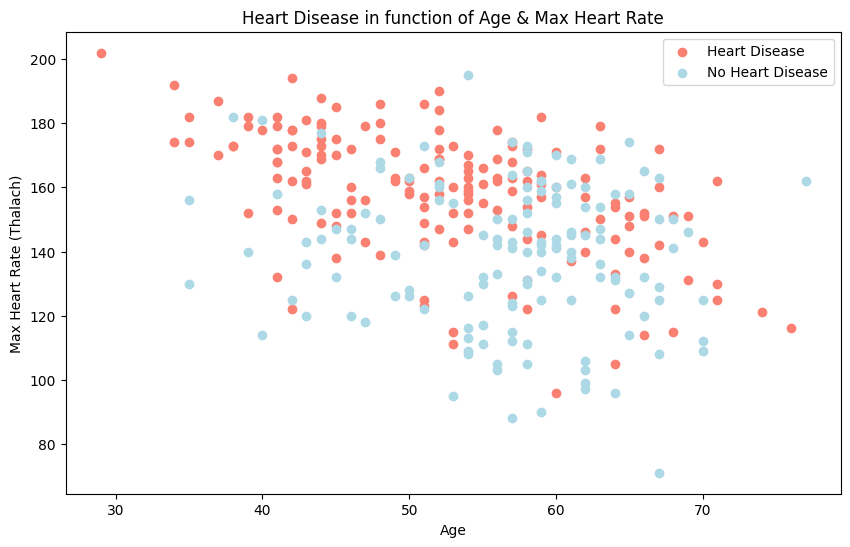

In [18]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Other infos about the plot
plt.title("Heart Disease in function of Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (Thalach)")
plt.legend(["Heart Disease", "No Heart Disease"]);

* Raw intuition from the output:
  1. As the age increases, max heart rate decreases.

-> Checking the distribution of the age column with a histogram

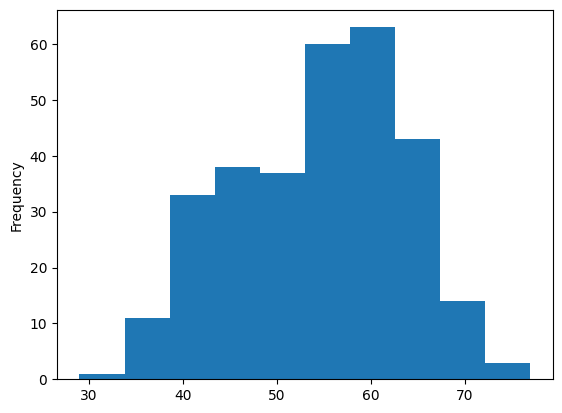

In [19]:
df.age.plot.hist();

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Majority of our dataset is b/w the age 55-65 (around 60)

* Heart Disease Frequency vs. Chest Pain(cp) Type

About cp from the documents: https://archive.ics.uci.edu/dataset/45/heart+disease 

cp: chest pain type
* Value 0: typical angina - chest pain related decrease blood supply to the heart
* Value 1: atypical angina - chest pain not related to heart
* Value 2: non-anginal pain - typically esophageal spasms (non heart related)
* Value 3: asymptomatic - chest pain not showing signs of disease


In [21]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [22]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


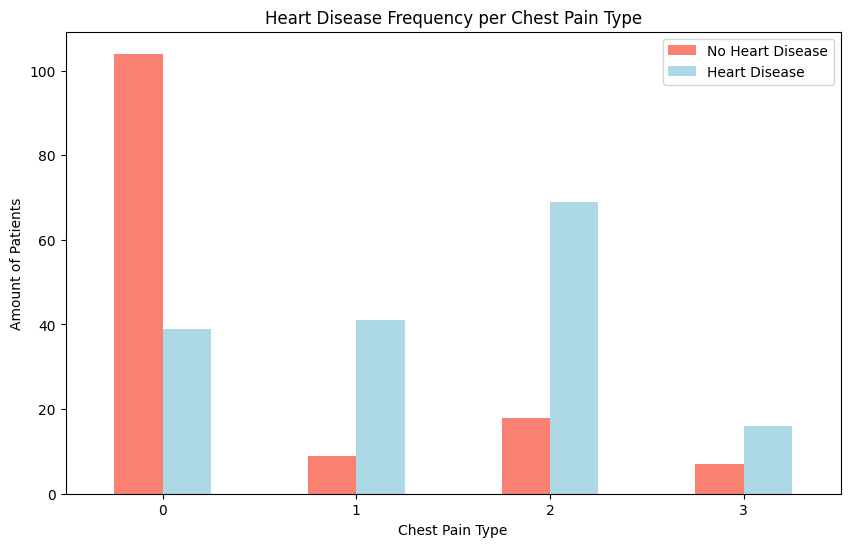

In [23]:
# Trying to make the crosstab a little bit more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])

# adding infos about the plot
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount of Patients")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Making a correlation matrix - how each independent variable (i.e. all the columns except target column) is related to each other (or interact with each other)

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Note: seaborn was not installed before so had to install it first

In [26]:
import seaborn as sns

In [27]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in c:\python_2022\lib\site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in c:\python_2022\lib\site-packages (from seaborn) (1.26.2)

Requirement already satisfied: pandas>=1.2 in c:\python_2022\lib\site-packages (from seaborn) (2.1.4)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\python_2022\lib\site-packages (from seaborn) (3.8.2)

Requirement already satisfied: contourpy>=1.0.1 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.0)

Requirement already satisfied: cycler>=0.10 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.47.0)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (23.2)

Requirement already satisfied: pillow>=8 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.1.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.1)

Requirement already satisfied: python-dateutil>=2.7 in c:\python_2022\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in c:\python_2022\lib\site-packages (from pandas>=1.2->seaborn) (2023.3.post1)

Requirement already satisfied: tzdata>=2022.1 in c:\python_2022\lib\site-packages (from pandas>=1.2->seaborn) (2023.4)

Requirement already satisfied: six>=1.5 in c:\python_2022\lib\site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\python_2022\python.exe -m pip install --upgrade pip

0

In [28]:
import seaborn as sns

seaborn installed, we'll resume with our correlation matrix

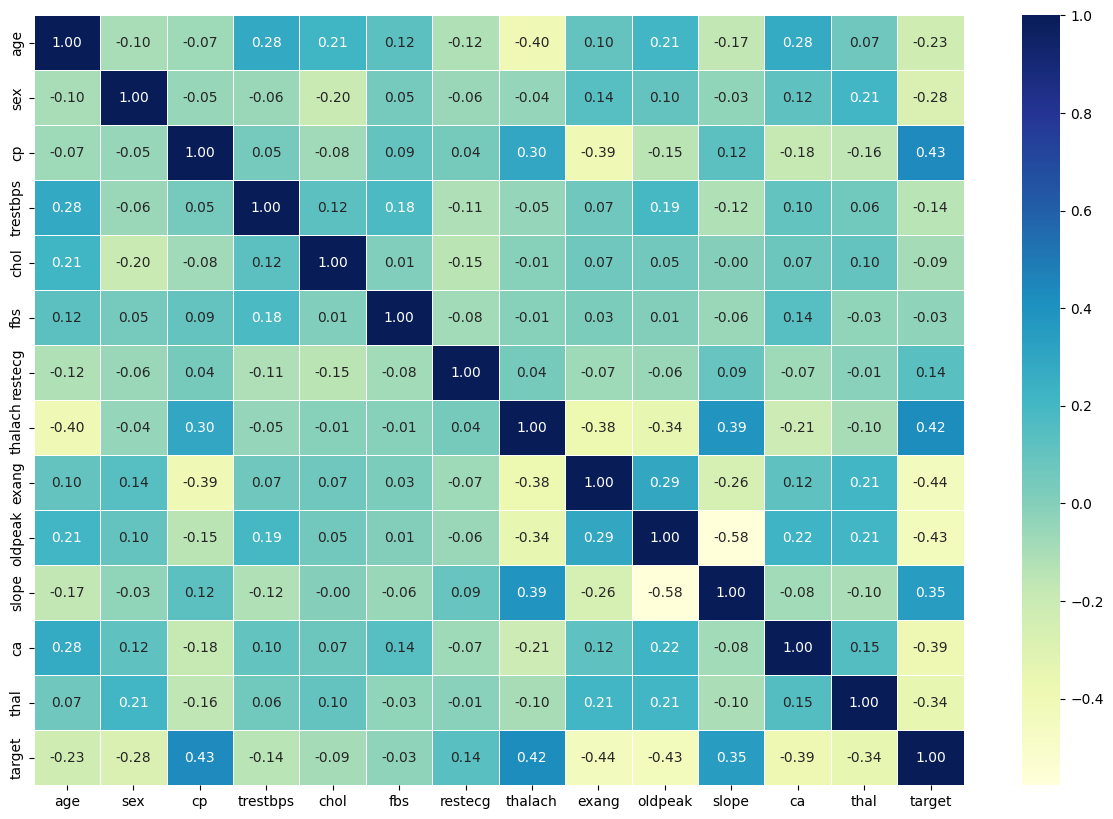

In [29]:
# Visualizing the correlation matrix with the help of seaborn

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

* Imp. points:
  1. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).
  2. **Positive Correlation:** A Relationship b/w 2 variabes in which both the variables increases with respect to each other.
  3. **Negative Correlation:** A Relationship b/w 2 variabes in which one variable increases as the other decreases.

Read this to know more about correlation matrix: https://www.statology.org/how-to-read-a-correlation-matrix/ 

### 5. Modelling

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# Split the data into X and y
X = df.drop("target", axis=1)
y = df.target

In [32]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [33]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [34]:
# Split the data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [36]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [37]:
len(X_train), len(y_train)

(242, 242)

In [38]:
len(X_test), len(y_test)

(61, 61)

Since we've got our data split into training & test sets, it's time we built a machine learning model.

* We'll train it (find the patterns) on the training set.
* And, we'll test it (use the patterns) on the test set.


**Important Question:** Which model to use?
-> Refer this: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

#### The models we are going to use:
1. Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [39]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score our models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine leaning models.
    models : a dict of different Scikit-learn Machine Learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Setting Random Seed
    np.random.seed(42)
    # Making a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

#### Checking how each of these models will perform...

In [40]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\python_2022\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison with the help of a graph

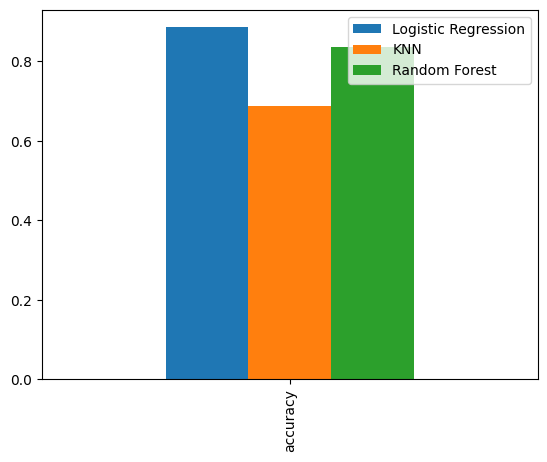

In [41]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar();

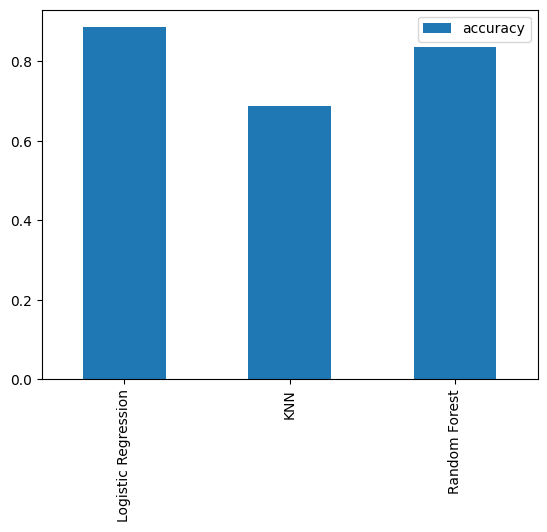

In [42]:
model_compare.T.plot.bar();

Since we've got our baseline models, and we also know that the 1st model predictions, aren't always what we should base our next steps off. So, the question is what should we do?


* Let's look at the following:
    1. Hyperparamter Tuning
    2. Feature Importance
    3. Confusion Matrix
    4. Cross-Validation
    5. Precision
    6. Recall
    7. F1 Score
    8. Classification Report
    9. ROC Curve
    10. Area Under the Curve (AUC)
 
Note: 1 & 2 are part of almost every ML model we work on.
      While the rest (3 to 10) are mrelated to classification problems.

* Hyperparamter Tuning (by hand)

In [43]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [44]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [45]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on test data: 75.41%


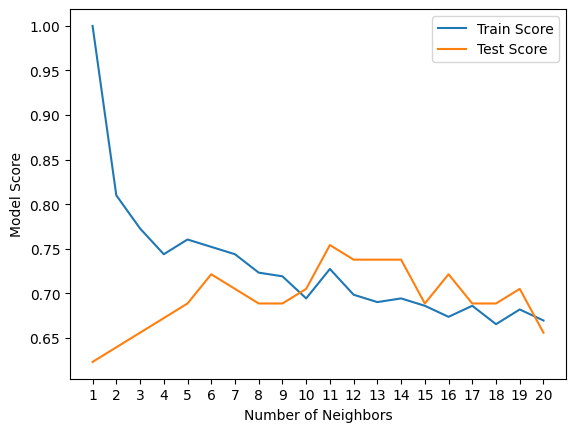

In [46]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on test data: {max(test_scores)*100:.2f}%")

* After tuning the hyperparameter of neigbors in KNN, we see that we were able to yield the best score of approx. 75% when b_neighbors are tuned to 11.

**Conclusion:** Even after hyperparameter tuning we are not able to best the scores of Logistic Regression and Random Forest Classifier. Hence, maybe we should discard the KNN model and pursue some other model for better results.

* Hyperparameter Tuning (by RandomizedSearchCV)

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [47]:
# Create a hyperparamter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [48]:
# to check how much logspace -4 to 4 is from above
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

Now, we've got our hyperparameter grids set up for each model, lets tune them using RandomizedSearchCV

In [49]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [51]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

* After tuning Logistic Regression model, we get the same score without any improvements.

In [52]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
# finding ghe best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [54]:
# Evaluating the RandomizedSearchCV RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [55]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

* After tuning Random Forest Classifier model, we do get a small bump in our score. But our default Logistic Regression model is still outscoring it.

* We could tune up our Random Forest Classifier model more but it still wont be enough. So rather than focusing our time on Random Forest Classifier and wasting it for not getting our desired output.

* Lets invest it solely on Logistic Regression and focus on improving it only.

* Hyperparameter Tuning (by GridSearchCV)

In [56]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [57]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [59]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

* We get the same result as before with Logistic Regression.

#### Evaluating our tuned ML classifier beyond accuracy

* ROC Curve & AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

... and it would be great if Cross-Validation is used where ever possible.


To make comparisons and evaluate our trained model, first we need to make predictions.

In [61]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [62]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

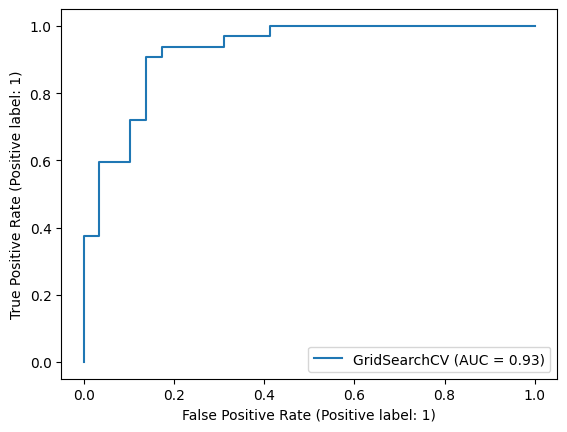

In [69]:
# Plot ROC Curve & calculate AUC metric

# plot_roc_curve(gs_log_reg, X_test, y_test
# the above code wont work in newer versions of scikit learn

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

* About ROC Curve Display: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay

In [70]:
# Confusion Matrix
print (confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


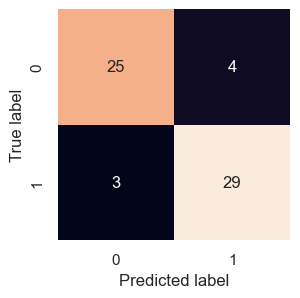

In [76]:
# Improving the visualization of Confusion Matrix with seaborn
# sns.set(font_scale=1)
# dont set the fonts, not worth it

# Scikit Learns confusion matrix function is not that good so we make our own
def plot_conf_mat(y_test, y_preds):
    """
    Plots a Confusion Matrix using Seaborn's heatmap()
    """

    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, # annotate the boxes
                    cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    # little bit different from the video

plot_conf_mat(y_test, y_preds)

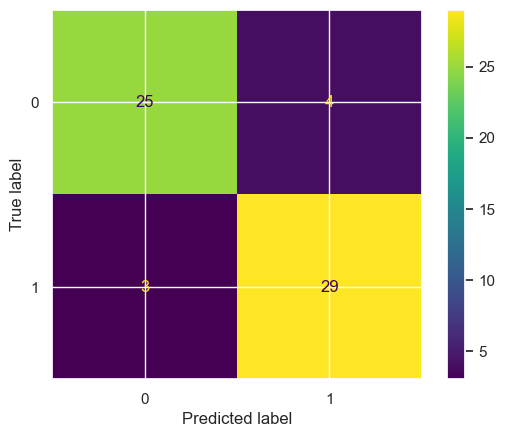

In [77]:
# Extra - Confusion Matrix of Scikit Learn

ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

In [81]:
classification_report(y_test, y_preds)
# i.e. why print is used with it

'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n'

In [82]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



The above Classification Report is only done on 1 set of Data with no Cross Validation.
So we need to use Classification Report on Cross Validated Test Data Set.

More about it, in the documents: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report 

* Calculate Evaluation metrics using Cross Validation

We're going to calculate accuracy, precision, recall, and f1-score of our model using Cross-Validation and to do so we'll use `cross_val_score()`.

Read about 'cross_val_score()' here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html 

In [83]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [85]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [86]:
# Cross-Validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [87]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [88]:
# Cross-Validated precision
cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [89]:
# Cross-Validated recall
cv_rec = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [90]:
# Cross-Validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

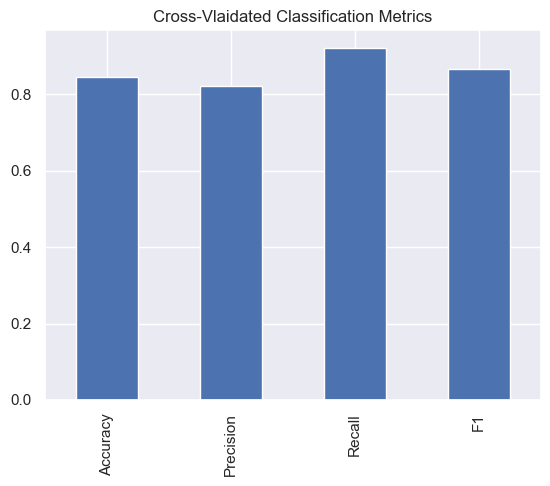

In [93]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                          "Recall": cv_rec,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-Vlaidated Classification Metrics", 
                     legend=False);

* Feature Importance:
  - Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how much did they contributed?".
 
  - Finding feature importance is different for different ML models. One way of finding feature importance of different models is to search for it - "(MODEL NAME) feature importance".


* Feature Importance of LogisticRegression model...

In [95]:
# Check for best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [96]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train);

In [98]:
# Attribute to fitted regression module called coef

# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
# match coef's of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672775125744686,
 'sex': -0.8604462617531493,
 'cp': 0.6606705112737149,
 'trestbps': -0.011569930915493508,
 'chol': -0.0016637441846093658,
 'fbs': 0.04386114942757081,
 'restecg': 0.3127582620910283,
 'thalach': 0.02459361246994142,
 'exang': -0.6041306524707951,
 'oldpeak': -0.568628196677622,
 'slope': 0.4505162332451247,
 'ca': -0.636098853689775,
 'thal': -0.6766337271477075}

* Tells that how much each feature (column) contributes to the target variable.

* And these values have come from building a ML model which has found patterns of Data.
* Its the same as EDA (exploratory data analysis) except its model driven EDA.

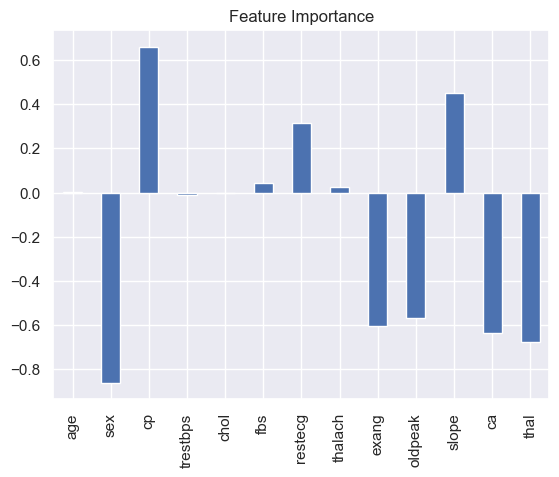

In [102]:
# Visualize feature importance
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

* Looking at the sex column which tells it is negatively correlated to target.
* That is value of sex increases, target value decreases.

In [107]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


Upon looking at crosstab, we do observe that as value of sex increases from 0 to 1, ratio of target patients decreases.

-> Makes sense now!!!

In [108]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


* As slope increases, so does the target variable, hence a positive correlation.

### 6. Experimentation
---> Already been doing it since modelling phase...


Since we haven't hit our evaluation metric (of 95%) yet...
We need to ask ourselves...
* Could we collect more data?
* Could we try a better model? (Like CatBoost or XGBoost)
* Could we improve the current models? (Beyond what we have already done so far...)

...Or if we done enough experiments with our model, or if we have met our evaluation metric, then how can we export/share it?